In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from datasets import BaseDataset, ExpertDataset, DatasetFromSubset
import transforms as tran

In [5]:
transforms = tran.Compose([
    tran.ToTensor(mask_as_integer=True),
   # tran.Resize((256, 256)),
   # tran.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

dataset = BaseDataset('../data/', transform=transforms, with_background=True, as_id_mask=True)

In [6]:
dataset[0]

(tensor([[[0.6118, 0.6549, 0.6745,  ..., 0.3647, 0.3569, 0.3725],
          [0.6392, 0.6588, 0.7216,  ..., 0.3843, 0.3804, 0.3765],
          [0.7137, 0.7098, 0.8000,  ..., 0.3647, 0.3725, 0.3647],
          ...,
          [0.5529, 0.5020, 0.4314,  ..., 0.6745, 0.6471, 0.6078],
          [0.5725, 0.5216, 0.4588,  ..., 0.6980, 0.6784, 0.6471],
          [0.6078, 0.5529, 0.4980,  ..., 0.6627, 0.6353, 0.6078]],
 
         [[0.4039, 0.4510, 0.4745,  ..., 0.1804, 0.1725, 0.1961],
          [0.4196, 0.4510, 0.5176,  ..., 0.2000, 0.1961, 0.2000],
          [0.4863, 0.4824, 0.5765,  ..., 0.1804, 0.1882, 0.1882],
          ...,
          [0.3176, 0.2627, 0.1922,  ..., 0.4471, 0.4157, 0.3804],
          [0.3255, 0.2706, 0.2078,  ..., 0.4706, 0.4510, 0.4196],
          [0.3529, 0.2980, 0.2353,  ..., 0.4353, 0.4078, 0.3804]],
 
         [[0.6784, 0.7333, 0.7686,  ..., 0.5490, 0.5333, 0.5529],
          [0.7059, 0.7333, 0.8118,  ..., 0.5686, 0.5569, 0.5569],
          [0.7843, 0.7804, 0.8863,  ...,

(512, 512, 4)


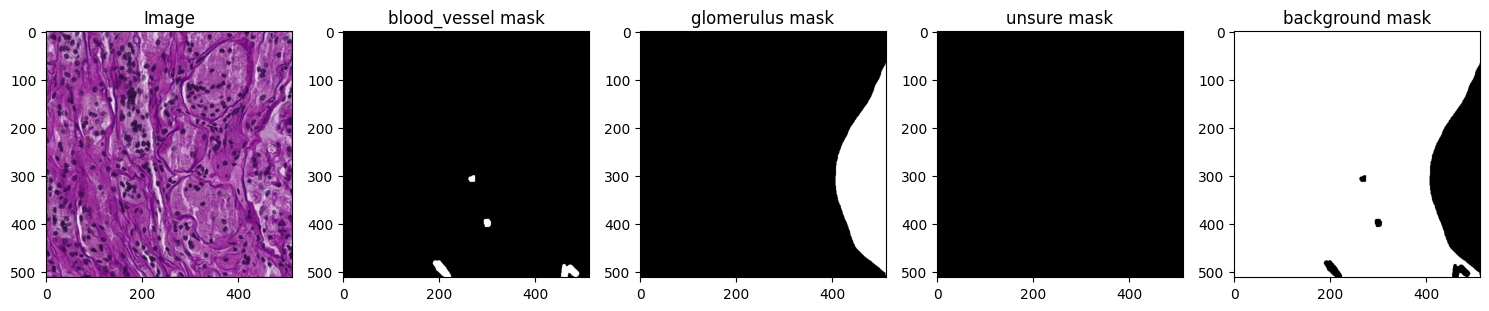

In [8]:
dataset.plot_example(5)

In [62]:
image, target = dataset.get(0, transform=base_transforms)

In [63]:
print(image.size())
print(target.size())

torch.Size([3, 256, 256])
torch.Size([4, 256, 256])


In [64]:
blood_vessels = target[0]
glumerus = target[1]
unsure = target[2]
background = target[3]

In [65]:
import torchvision.transforms as T

toPILImage = T.ToPILImage()

In [66]:
imagePIL = toPILImage(image)

In [67]:
import numpy as np

np.array(imagePIL).shape

(256, 256, 3)

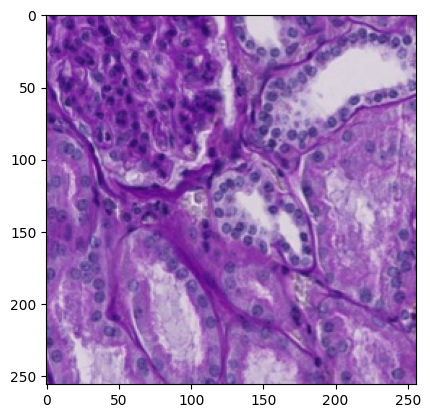

In [68]:
import matplotlib.pyplot as plt

imagePIL = imagePIL.convert("RGBA")
plt.imshow(imagePIL)

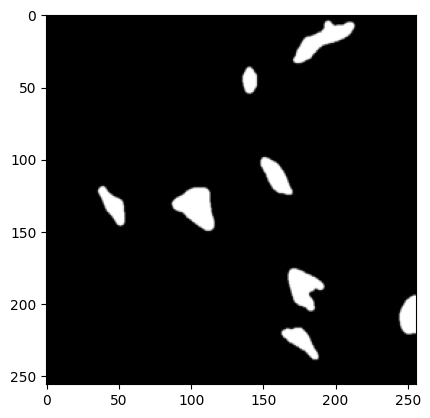

In [69]:
bvTartgetPIL = toPILImage(target[0])
bvTartgetPIL = bvTartgetPIL.convert("RGBA")
plt.imshow(bvTartgetPIL)

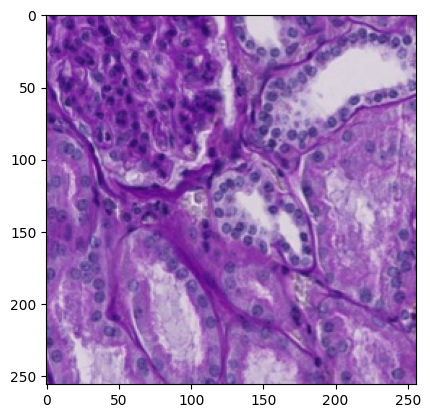

In [70]:
new_img = PIL.Image.blend(imagePIL, bvTartgetPIL, 1)
plt.imshow(imagePIL)

In [72]:
from skimage.color import label2rgb
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
idx = 5

tensor(0.) tensor(3.)


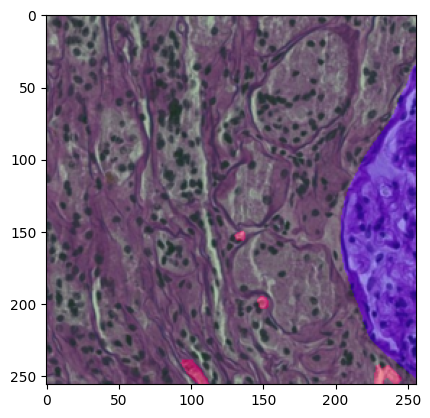

In [73]:
toPILImage = T.ToPILImage()

image, target = dataset.get(5, transform=base_transforms)
imagePIL = toPILImage(image)
image_np = np.array(imagePIL)
# print(image_np.shape)
# target = toPILImage(target)

# img = image.numpy()
# print(img.shape)
# label_image = target.argmax(dim=0).numpy()
# print(label_image.shape)
target = target.argmax(dim=0, keepdims=True).type(torch.float32)
print(target.min(), target.max())
targetPIL = toPILImage(target)
target_np = np.array(targetPIL)

image_label_overlay = label2rgb(
    target_np,
    image=image_np,
    bg_label=3,
    colors=["red", "green", "blue"],
    kind="overlay",
    saturation=1.0,
)

plt.imshow(image_label_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


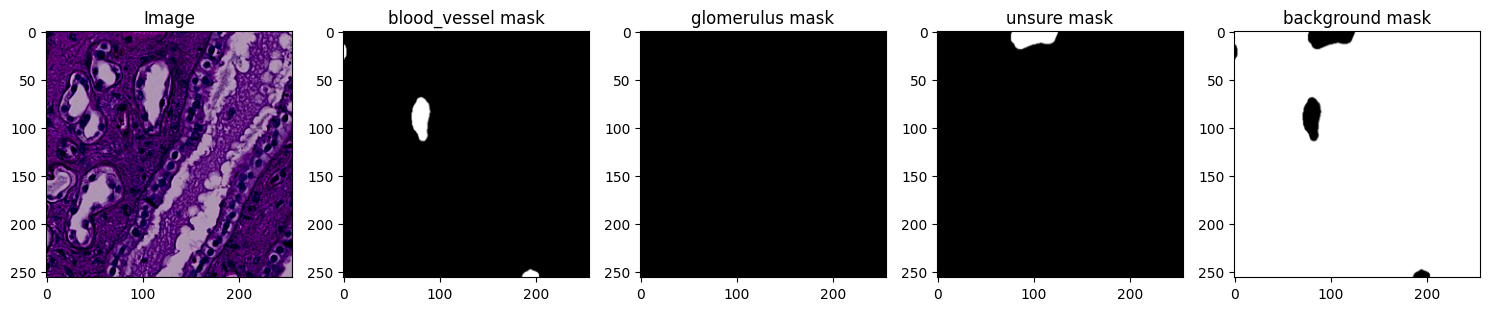

In [74]:
dataset.plot_example(2)

In [35]:
a = np.array([[[0, 1, 0], [1, 0, 0]], [[1, 1, 0], [1, 0, 0]]])
np.sum(a[:, :, 1:], axis=2)

array([[1, 0],
       [1, 0]])

<class 'numpy.ndarray'>
(203, 284)
7 252


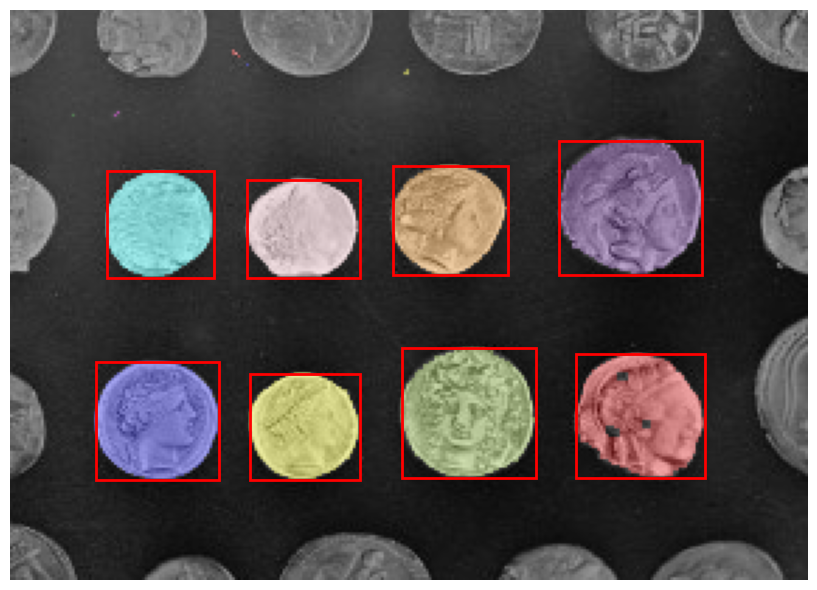

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]
print(type(image))
print(image.shape)
print(image.min(), image.max())

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle(
            (minc, minr),
            maxc - minc,
            maxr - minr,
            fill=False,
            edgecolor="red",
            linewidth=2,
        )
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()